### correlation of NDVI to SPI before and after drought

In [2]:
import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import seaborn
import shapefile

%matplotlib inline
# seaborn.set_style('dark')
from scipy import stats

from scipy.stats import linregress, pearsonr, spearmanr


### save difference of correlation to NC

In [5]:
corr_diff_12M=xr.open_dataset( '/g/data/oe9/project/team-drip/Spatial_temporal_correlation/SPI_VI_before_after/corr_diff_12M_NDVI.nc')
corr_diff_12M

<xarray.Dataset>
Dimensions:     (latitude: 263, longitude: 280)
Coordinates:
  * latitude    (latitude) float64 -24.55 -24.6 -24.65 -24.7 -24.75 -24.8 ...
  * longitude   (longitude) float64 138.5 138.6 138.6 138.7 138.7 138.8 ...
Data variables:
    pearson_r   (latitude, longitude) float64 ...
    pearson_p   (latitude, longitude) float64 ...
    spearman_r  (latitude, longitude) float64 ...
    spearman_p  (latitude, longitude) float64 ...

### plot the correlation comparision map

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


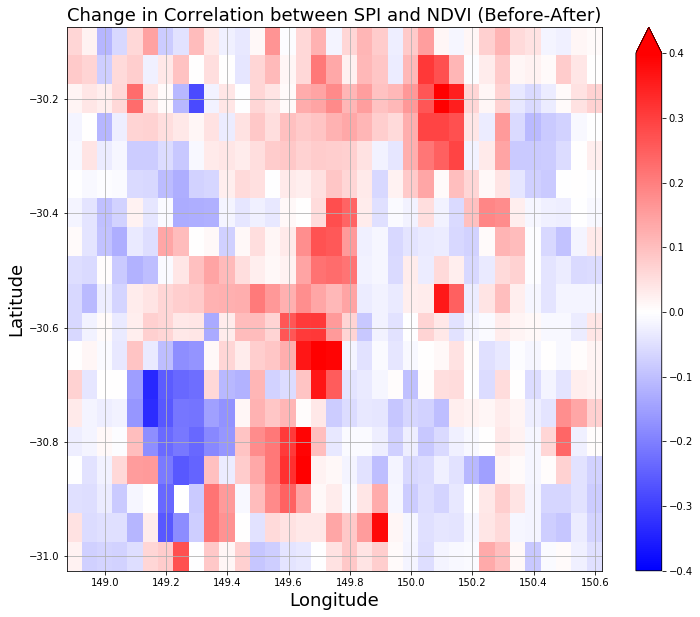

In [9]:
import matplotlib.pyplot as plt
fname = '/g/data/oe9/project/team-drip/results/spi_ndvi_cor_dif.png'

SIGNIFICANT = 0.05  # Choose your own!
# corr_diff_12M = corr_spi_sub_dt - corr_spi_sub_rc
fig = plt.figure(figsize=(12, 10))
dif = corr_diff_12M.pearson_r.where(corr_diff_12M.pearson_p < 0.05).sel(latitude=slice(-30.1, -31),longitude=slice(148.9,150.6))
import shapefile   

shpFilePath = '/g/data/oe9/project/team-drip/MDB_shapefile/mdb_boundary/mdb_boundary.shp' 
listx=[]
listy=[]
test = shapefile.Reader(shpFilePath)
for sr in test.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
plt.plot(listx,listy,color='black')


dif.plot(robust=True,cmap = 'bwr',vmin = -0.4, vmax = 0.4)
plt.xlabel('Longitude',fontsize=18)
plt.ylabel('Latitude',fontsize=18)
plt.title('Change in Correlation between SPI and NDVI (Before-After)', fontsize=18)
plt.grid(True)

# fig.savefig(fname, dpi=600)

# import matplotlib.pyplot as plt
# fname = '/home/599/rg6346/EVI_test.png'
# fig = plt.figure()
# plt.plot(evi_ts.time,evi_ts,'g^-',ndvi_ts.time,ndvi_ts/2,'yo-',aet_ts.time,aet_ts/200,'b--')
# fig.savefig(fname, dpi=300)